We will test the Sidlivovitch formulae for the cross-product of trigonometric series

In [249]:
Q <- function(wT) {sin(wT)/(wT)*(pi^2)/(pi^2-(wT)^2)}
Qprime <- function(y) {pi^2/(pi^2-y^2)/y*(cos(y)+(sin(y)/y)*(3*y^2-pi^2)/(pi^2-y^2))}
Qsecond0 <- 2/pi^2 - 1./3. 

T is half the total time.  The product function between two series is

In [84]:
haan <- function(t, T) {1 - cos(pi*t/T)}
hprod <- function (s1, s2, times){
    T <- (diff(times)[1] * length(times))/2 
    mean(s1 * Conj(s2) * haan(times, T))
    }

In [85]:
times <- seq(0,100, 0.1)
w1 <- 0.23
w2 <- 0.54
eiw1 <- exp(1i*w1*times)
eiw2 <- exp(1i*w2*times)
hprod(eiw1, eiw2, times)

[1] 5.173122e-04+1.008114e-04i

In principle, this should correspond to the analytical estimate as follows:

In [86]:
T <- (diff(times)[1] * length(times))/2 
analytical_estimate <- exp(1i*(w1-w2)*T) * Q((w1-w2)*T)
analytical_estimate

[1] 5.173122e-04+1.008114e-04i

As we see it, the match is not perfect, let us see if at least we get the general shape right


[1] 50.05

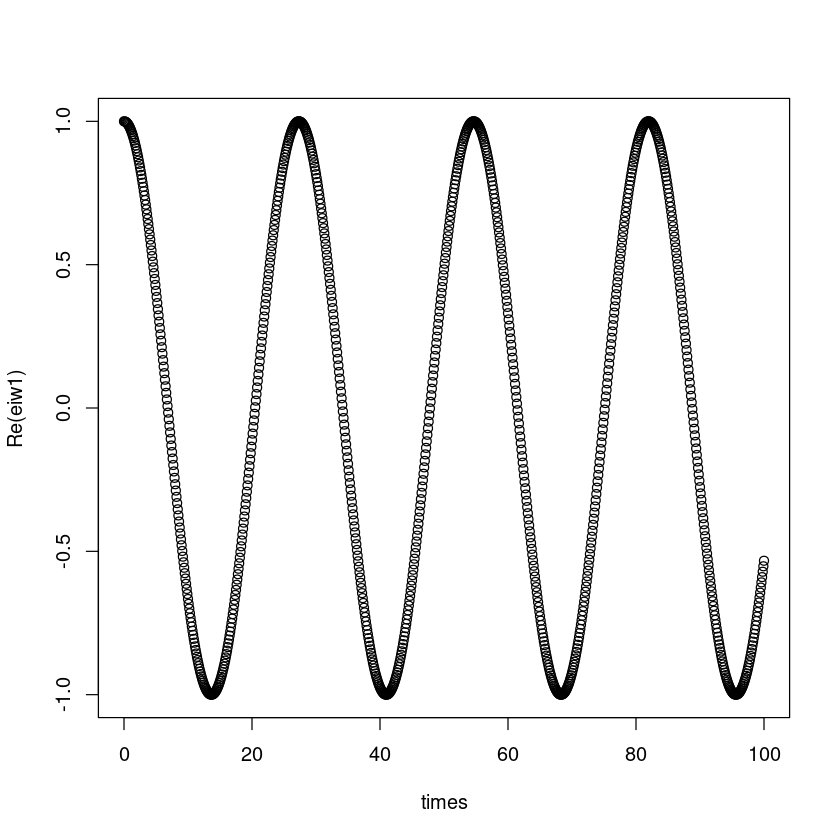

In [87]:
plot(times, Re(eiw1))
T

[1] -1.443984e-13-1.096234e-12i  2.649547e-13-6.845635e-13i
 [3]  2.264855e-13-1.909584e-13i  2.553513e-14-5.190293e-15i
 [5]  5.562217e-14+1.720846e-14i  2.623457e-13+2.706724e-13i
 [7]  2.188527e-13+7.923662e-13i -2.632894e-13+1.118994e-12i
 [9] -7.500667e-13+8.355538e-13i -5.757617e-13+2.028377e-13i
[11]  3.434475e-13+5.605238e-14i  1.208755e-12+9.423573e-13i
[13]  1.027428e-12+2.376460e-12i -2.892461e-13+3.122058e-12i
[15] -1.611156e-12+2.391309e-12i -1.552664e-12+8.031822e-13i
[17]  9.548590e-14+2.228950e-15i  1.931656e-12+1.115318e-12i
[19]  2.126677e-12+3.494743e-12i  2.359434e-13+5.106051e-12i
[21] -2.147156e-12+4.396272e-12i

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“imaginary parts discarded in coercion”


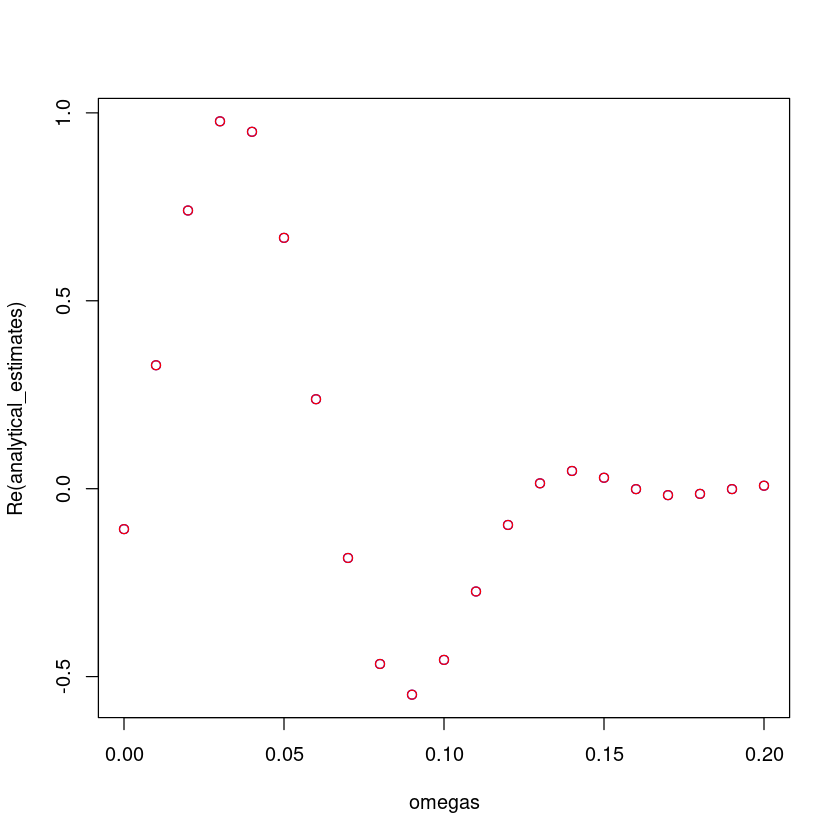

Warning message in xy.coords(x, y):
“imaginary parts discarded in coercion”


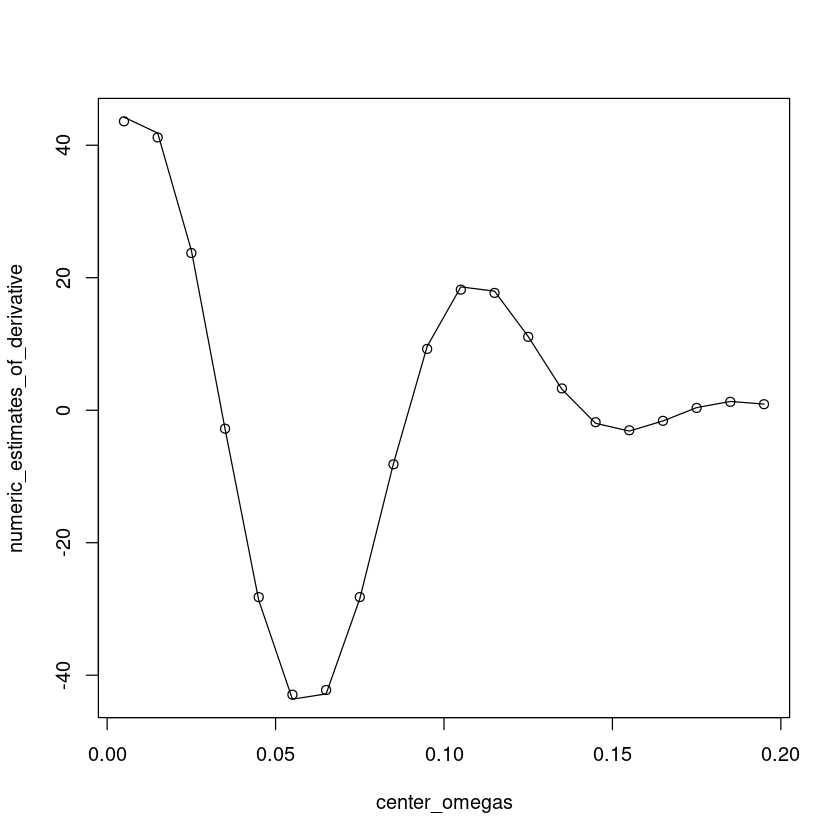

In [137]:
omegas <- seq(0, 0.2, 0.01)
omega2 <- 0.034
numeric_estimates <- sapply(omegas, function(omega) { 
eiw1 <- exp(1i*omega*times)
eiw2 <- exp(1i*omega2*times)
hprod(eiw1, eiw2, times)})
analytical_estimates <- sapply(omegas, function (omega){ 
exp(1i*(omega-omega2)*T) * Q((omega-omega2)*T)})
plot(omegas, Re(analytical_estimates), type='n')
points(omegas, Re(numeric_estimates), col='blue')
points(omegas, Re(analytical_estimates), col='red')
numeric_estimates - analytical_estimates

center_omegas <- omegas[-length(omegas)] + diff(omegas)[1]/2
numeric_estimates_of_derivative <- diff(numeric_estimates) / diff(omegas)[1]
analytical_estimates_of_derivative <- ( 
    1i*T*exp(1i*(center_omegas-omega2)*T)*Q((center_omegas-omega2)*T) + 
    exp(1i*(center_omegas-omega2)*T)*Qprime((center_omegas-omega2)*T)*T)             



plot(center_omegas, numeric_estimates_of_derivative, 'p')
lines(center_omegas, analytical_estimates_of_derivative)

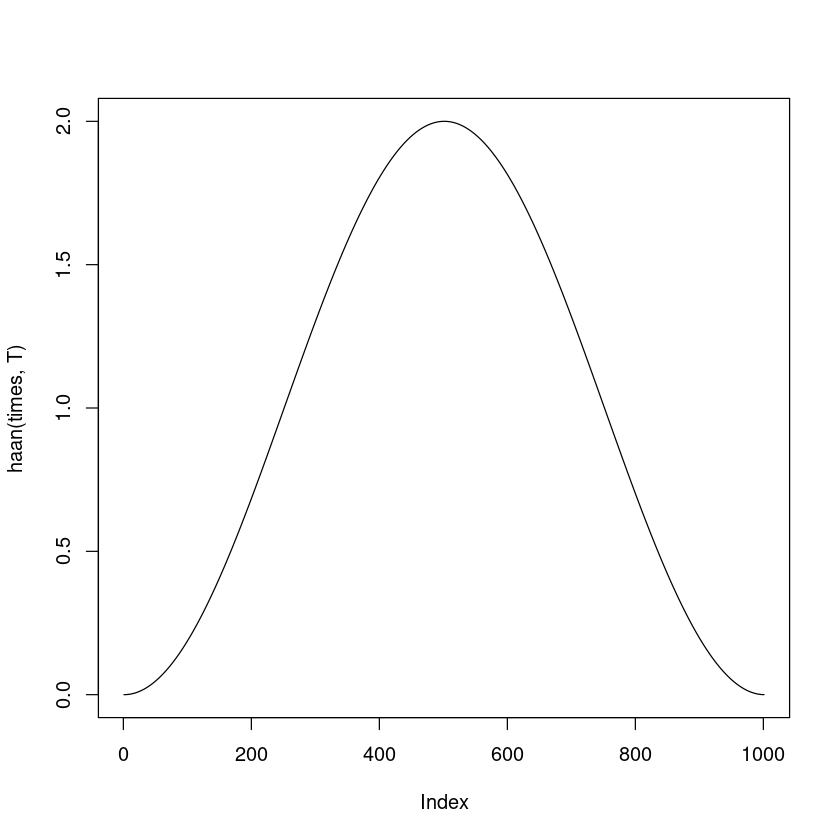

In [89]:
plot(haan(times, T), type='l')

Ok this is damned perfect. No lets' make sure we have the right formulas for the product of sines, cosines, etc. 

[1] -2.055023e-13 -1.476597e-13  6.383782e-15  1.853656e-13  2.663147e-13
 [6]  1.549316e-13 -1.258438e-13 -3.563816e-13 -3.134715e-13  2.928213e-14
[11]  4.125277e-13  4.770854e-13  1.010754e-13 -4.305497e-13 -6.319034e-13
[16] -2.602805e-13  4.076839e-13  7.702396e-13  4.423640e-13 -3.424841e-13
[21] -8.843993e-13

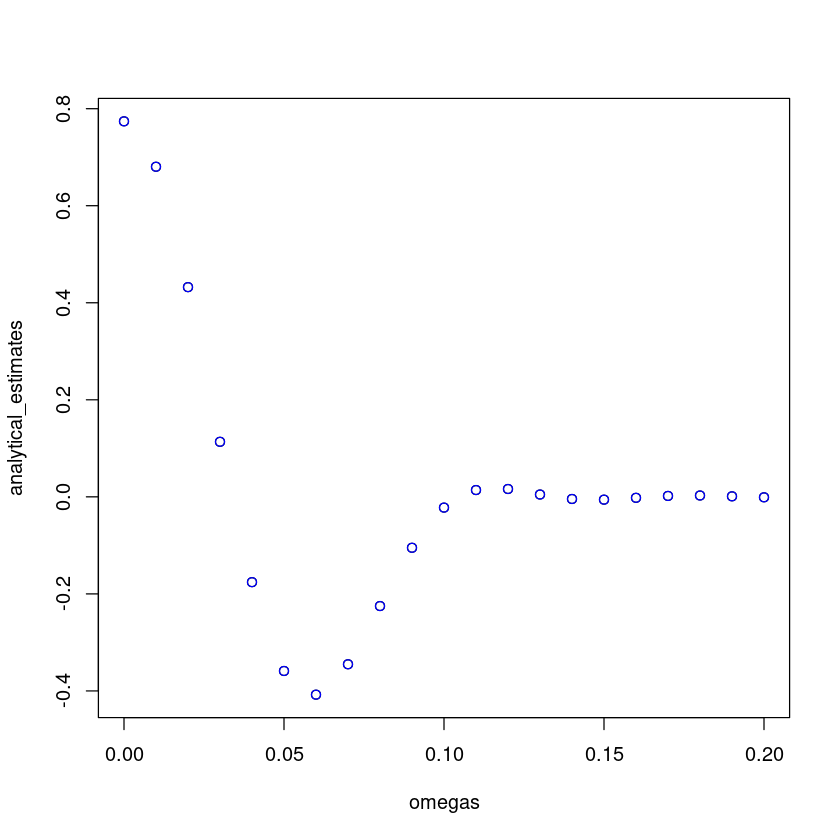

In [90]:
omegas <- seq(0, 0.2, 0.01)
phi1 <- 0.243
omega2 = 0.013
numeric_estimates <- sapply(omegas, function(omega) { 
eiw1 <- cos(omega*times)
eiw2 <- cos(omega2*times) 
hprod(eiw1, eiw2, times)})
analytical_estimates <- sapply(omegas, function (omega){ 0.5 * (
    cos((omega-omega2)*T) * Q((omega-omega2)*T) + 
    cos((omega+omega2)*T) * Q((omega+omega2)*T))})


plot(omegas, analytical_estimates)
points(omegas, numeric_estimates, col='blue')
analytical_estimates - numeric_estimates


[1]  0.000000e+00  1.329492e-13 -8.065770e-14 -4.619638e-13 -4.545253e-13
 [6]  1.684763e-13  8.966577e-13  8.668066e-13 -1.376399e-13 -1.278533e-12
[11] -1.349074e-12 -2.993526e-14  1.583005e-12  1.877980e-12  3.282187e-13
[16] -1.788117e-12 -2.427522e-12 -7.502870e-13  1.875189e-12  2.970232e-12
[21]  1.284554e-12

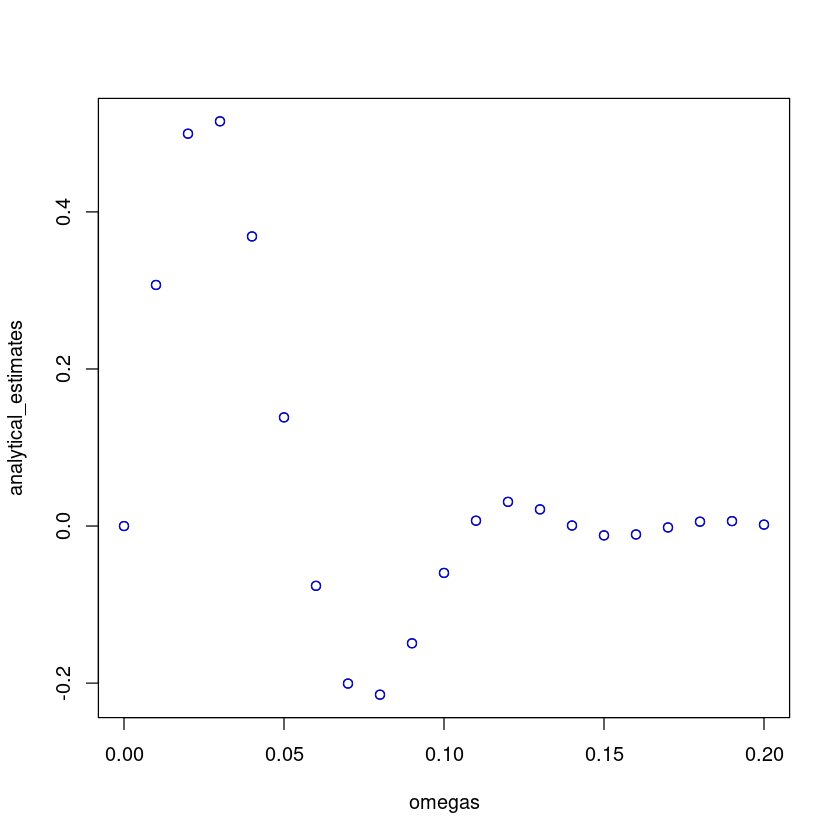

In [93]:
omegas <- seq(0, 0.2, 0.01)
omega2 = 0.013
numeric_estimates <- sapply(omegas, function(omega) { 
eiw1 <- sin(omega*times)
eiw2 <- sin(omega2*times) 
hprod(eiw1, eiw2, times)})
analytical_estimates <- sapply(omegas, function (omega){ 0.5 * (
    cos((omega-omega2)*T) * Q((omega-omega2)*T) -
    cos((omega+omega2)*T) * Q((omega+omega2)*T))})


plot(omegas, analytical_estimates)
points(omegas, numeric_estimates, col='blue')
analytical_estimates - numeric_estimates

[1]  0.000000e+00 -3.134160e-13 -5.512257e-13 -6.501466e-13 -6.133982e-13
 [6] -5.602185e-13 -6.757928e-13 -1.055010e-12 -1.568606e-12 -1.918549e-12
[11] -1.890488e-12 -1.591116e-12 -1.414355e-12 -1.708869e-12 -2.424925e-12
[16] -3.095279e-12 -3.227509e-12 -2.781652e-12 -2.270670e-12 -2.332971e-12
[21] -3.129020e-12

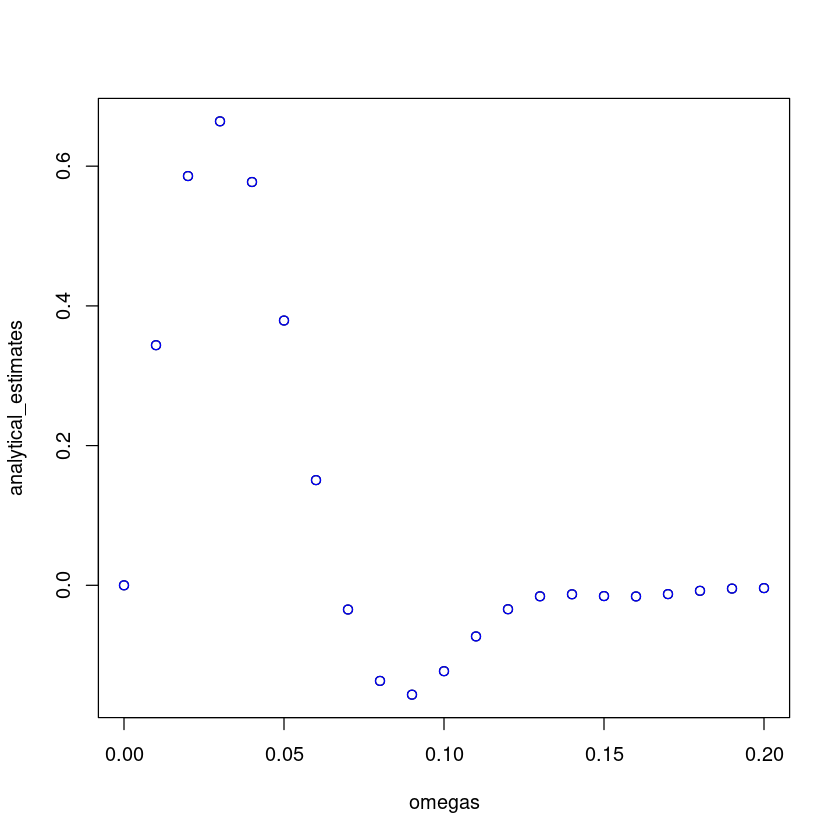

In [95]:
omegas <- seq(0, 0.2, 0.01)
omega2 = 0.013
numeric_estimates <- sapply(omegas, function(omega) { 
eiw1 <- sin(omega*times)
eiw2 <- cos(omega2*times) 
hprod(eiw1, eiw2, times)})
analytical_estimates <- sapply(omegas, function (omega){ 0.5 * (
    sin((omega-omega2)*T) * Q((omega-omega2)*T) +
    sin((omega+omega2)*T) * Q((omega+omega2)*T))})


plot(omegas, analytical_estimates)
points(omegas, numeric_estimates, col='blue')
analytical_estimates - numeric_estimates

[1] -1.564304e-13 -3.156919e-13 -5.240808e-13 -3.348780e-13  2.302603e-13
 [6]  5.601630e-13  1.011413e-13 -9.034995e-13 -1.471719e-12 -8.398143e-13
[11]  6.126488e-13  1.526335e-12  8.336214e-13 -1.049687e-12 -2.402639e-12
[16] -1.771703e-12  4.995865e-13  2.368036e-12  1.927844e-12 -6.637799e-13
[21] -3.102850e-12

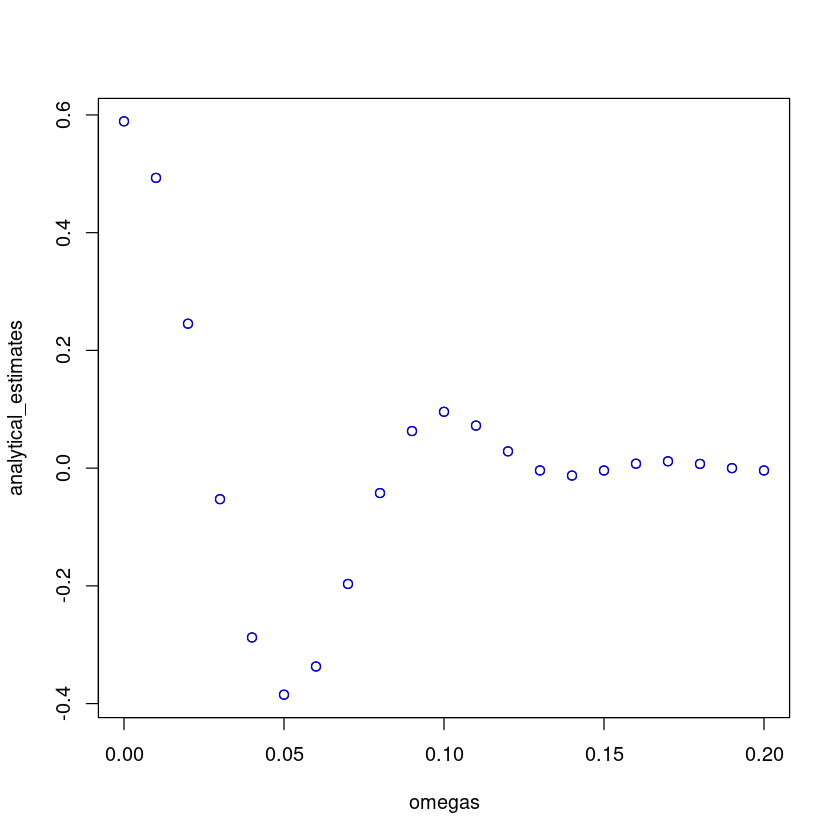

In [98]:
omegas <- seq(0, 0.2, 0.01)
omega2 = 0.013
numeric_estimates <- sapply(omegas, function(omega) { 
eiw1 <- cos(omega*times)
eiw2 <- sin(omega2*times) 
hprod(eiw1, eiw2, times)})
analytical_estimates <- sapply(omegas, function (omega){ -0.5 * (
    sin((omega-omega2)*T) * Q((omega-omega2)*T) -
    sin((omega+omega2)*T) * Q((omega+omega2)*T))})


plot(omegas, analytical_estimates)
points(omegas, numeric_estimates, col='blue')
analytical_estimates - numeric_estimates

[1] -1.983969e-13 -1.262324e-13  4.235501e-14  2.148837e-13  2.705058e-13
 [6]  1.443845e-13 -1.127431e-13 -2.905454e-13 -2.116640e-13  1.107031e-13
[11]  4.300206e-13  4.491841e-13  1.009505e-13 -3.412548e-13 -4.681945e-13
[16] -1.102217e-13  4.614013e-13  7.337869e-13  4.156770e-13 -2.536500e-13
[21] -6.720453e-13

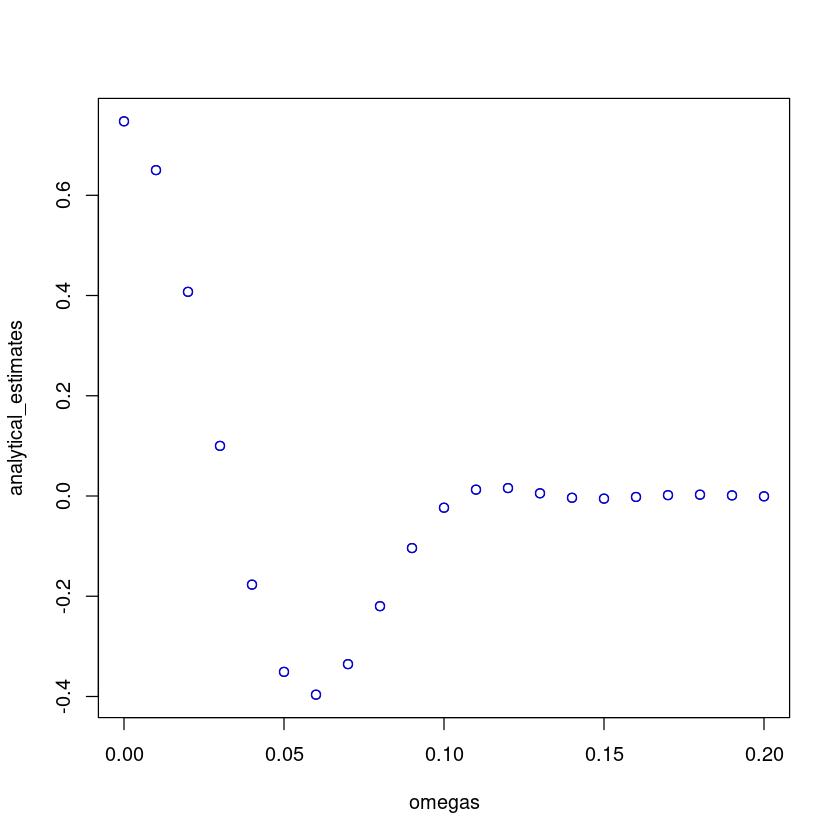

In [110]:
omegas <- seq(0, 0.2, 0.01)
phi1 <- 0.0243
phi2 <- 0.0432
omega2 = 0.013
numeric_estimates <- sapply(omegas, function(omega) { 
eiw1 <- cos(omega*times + phi1)
eiw2 <- cos(omega2*times + phi2) 
hprod(eiw1, eiw2, times)})
analytical_estimates <- sapply(omegas, function (omega){ 0.5 * ( 
   (
    cos(phi1-phi2)*cos((omega-omega2)*T) * Q((omega-omega2)*T)  + 
    cos(phi1+phi2)*cos((omega+omega2)*T) * Q((omega+omega2)*T)) -
   (
    sin(phi1-phi2)*sin((omega-omega2)*T) * Q((omega-omega2)*T) +
    sin(phi1+phi2)*sin((omega+omega2)*T) * Q((omega+omega2)*T)))}) 


plot(omegas, analytical_estimates)
points(omegas, numeric_estimates, col='blue')
analytical_estimates - numeric_estimates


To derive any arbitrary formula, use simply that cos(x) = sin(\pi/2-x)

[1] -4.812123e-15 -3.221312e-13 -5.463408e-13 -6.245005e-13 -5.867529e-13
 [6] -5.634382e-13 -7.167600e-13 -1.098767e-12 -1.566774e-12 -1.859402e-12
[11] -1.820571e-12 -1.577904e-12 -1.479379e-12 -1.797194e-12 -2.448921e-12
[16] -3.018738e-12 -3.109379e-12 -2.729634e-12 -2.340132e-12 -2.465959e-12
[21] -3.198847e-12

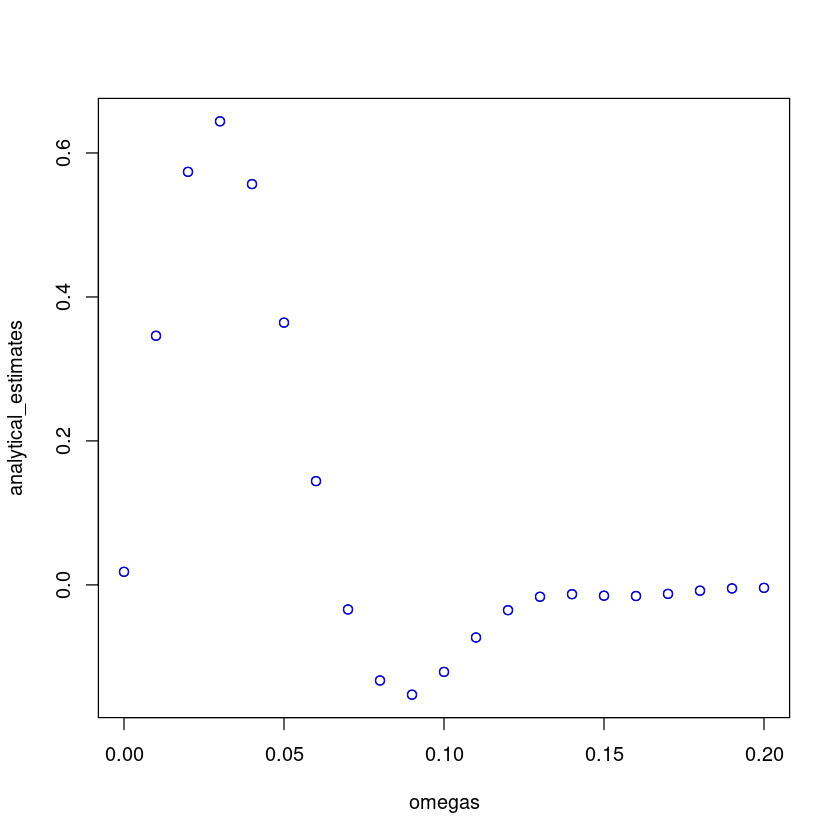

In [119]:
omegas <- seq(0, 0.2, 0.01)
phi1 <- 0.0243
phi2 <- 0.0432
dphi <- phi1 - phi2
omega2 = 0.013
numeric_estimates <- sapply(omegas, function(omega) { 
eiw1 <- sin(omega*times + phi1)
eiw2 <- cos(omega2*times + phi2)
    
# so this is equivalent to eiw1 <- cos ( - omega*times + (pi/2 - phi1). Replace omega1 by -omega1 and cos(phi1 + any) by sin(phi1 + any) etc
    
# then you can use that Q and cos are even, sin is odd to make it nicer)
hprod(eiw1, eiw2, times)})
analytical_estimates <- sapply(omegas, function (omega){ 0.5 * ( 
   (
    sin(phi1+phi2)*cos((omega+omega2)*T) * Q((omega+omega2)*T)  + 
    sin(phi1-phi2)*cos((-omega+omega2)*T) * Q((-omega+omega2)*T)) +
   (
    cos(phi1+phi2)*sin((+omega+omega2)*T) * Q((omega+omega2)*T) -
    cos(phi1-phi2)*sin((-omega+omega2)*T) * Q((-omega+omega2)*T)))}) 


plot(omegas, analytical_estimates)
points(omegas, numeric_estimates, col='blue')
analytical_estimates - numeric_estimates



[1] -4.052314e-15  1.114664e-13 -1.170175e-13 -4.973799e-13 -4.745648e-13
 [6]  1.579292e-13  8.687912e-13  7.978618e-13 -2.412515e-13 -1.380146e-12
[11] -1.413758e-12 -6.105446e-14  1.540341e-12  1.775961e-12  1.641350e-13
[16] -1.962838e-12 -2.551332e-12 -8.111667e-13  1.822121e-12  2.849387e-12
[21]  1.071632e-12

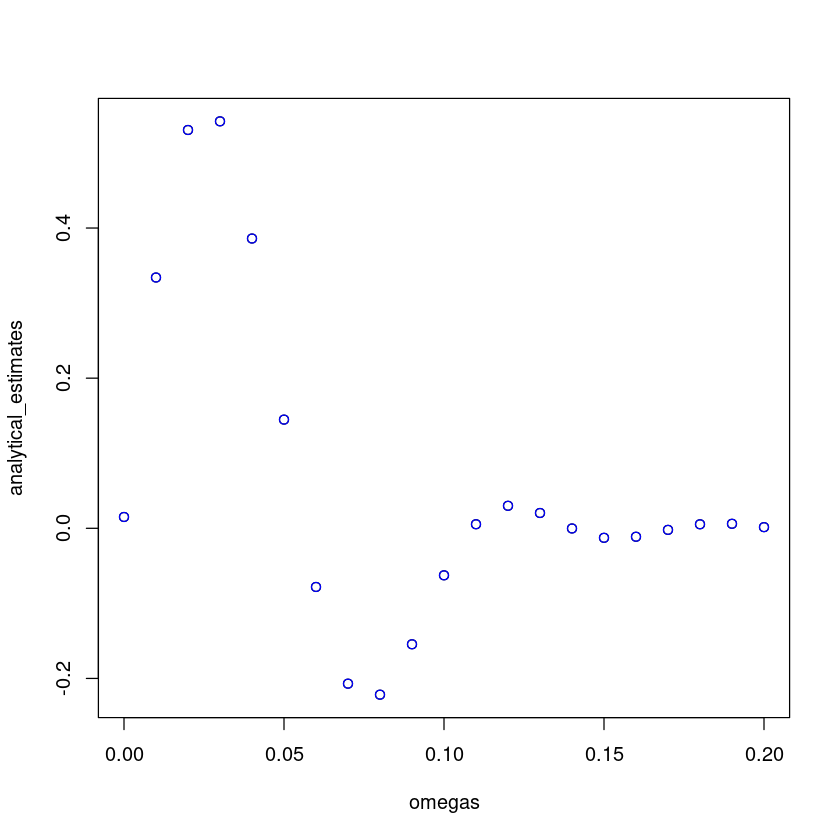

In [127]:
omegas <- seq(0, 0.2, 0.01)
phi1 <- 0.0243
phi2 <- 0.0432
dphi <- phi1 - phi2
omega2 = 0.013
numeric_estimates <- sapply(omegas, function(omega) { 
eiw1 <- sin(omega*times + phi1)
eiw2 <- sin(omega2*times + phi2)
    
# so this is equivalent to eiw1 <- cos ( - omega*times + (pi/2 - phi1). Replace omega1 by -omega1 and cos(phi1 + any) by sin(phi1 + any) etc
    
# then you can use that Q and cos are even, sin is odd to make it nicer)
hprod(eiw1, eiw2, times)})
analytical_estimates <- sapply(omegas, function (omega){ 0.5 * ( 
   (
    cos(-phi1+phi2)*cos((omega-omega2)*T) * Q((omega-omega2)*T)  - 
    cos(+phi1+phi2)*cos((+omega+omega2)*T) * Q((omega+omega2)*T)) +
   (
    sin(-phi1+phi2)*sin((+omega-omega2)*T) * Q((omega-omega2)*T) +
    sin(+phi1+phi2)*sin((+omega+omega2)*T) * Q((omega+omega2)*T)))}) 


plot(omegas, analytical_estimates)
points(omegas, numeric_estimates, col='blue')
analytical_estimates - numeric_estimates


now we look at the fourier power of a signal and its analytical expression

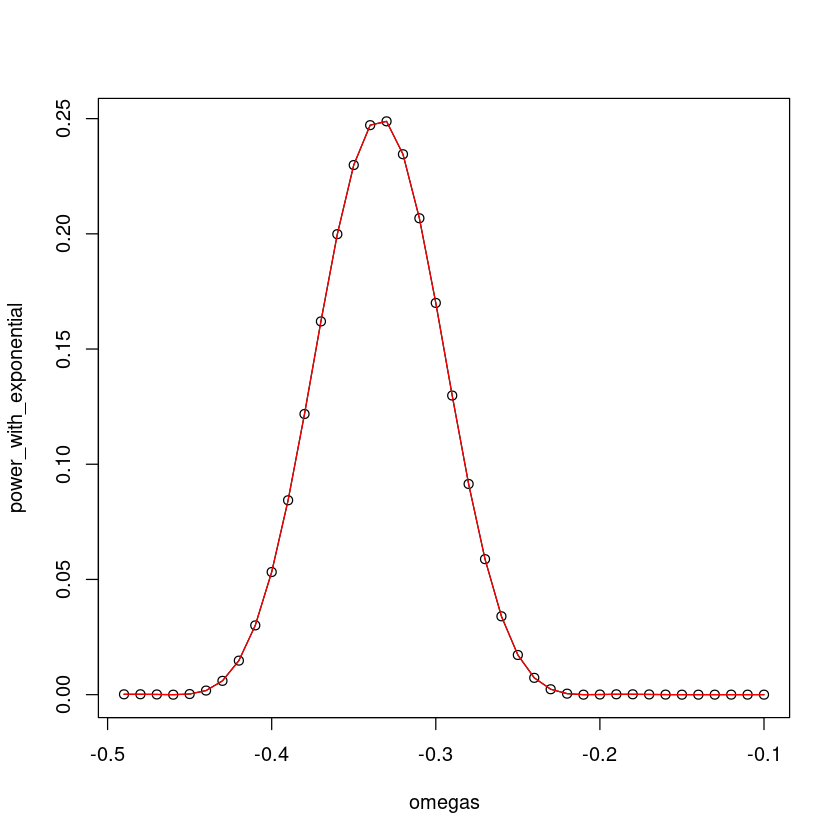

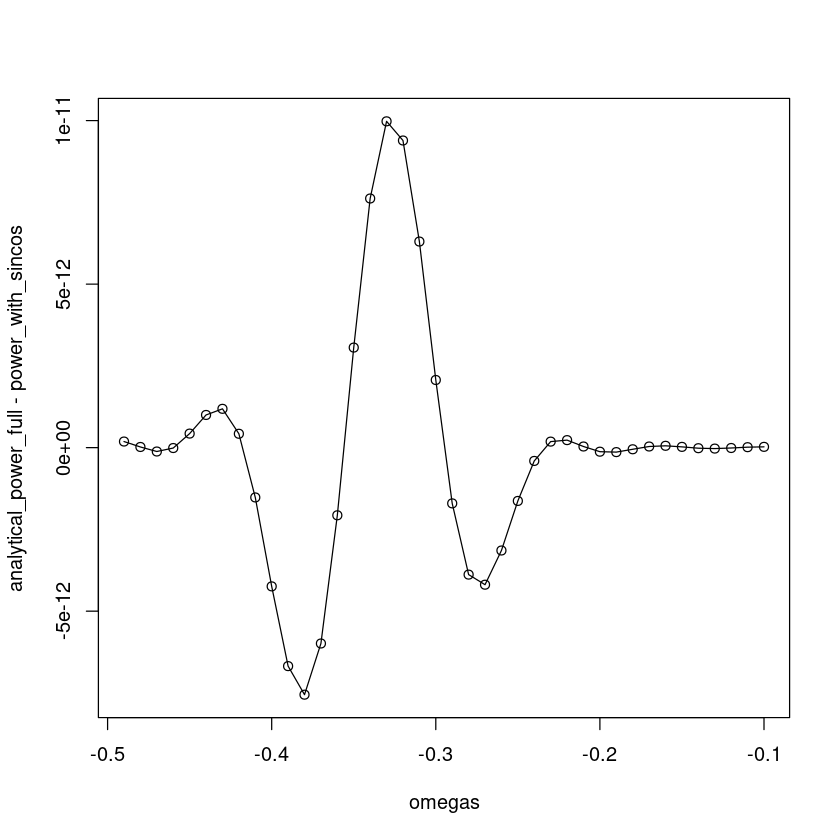

In [230]:
omega1 <- 0.334
omegas <- seq(40)*0.01 - 0.5
phi1 <- 0.4
signal <- cos(omega1*times + phi1)
power_with_exponential <- sapply(omegas, function(omega){
    Mod(hprod(signal, exp(1i*omega*times), times))^2})
power_with_sincos <-  sapply(omegas, function(omega){
     hprod(signal, cos(omega*times), times)^2 + 
     hprod(signal, sin(omega*times), times)^2})

plot(omegas, power_with_exponential)
lines(omegas, power_with_sincos)

analytical_power_simple <- sapply(omegas, function(omega){
    (   (Q((omega - omega1) *T) / 2) ^2)  })  
    
    
analytical_power_full <- sapply(omegas, function(omega){
       (
    Mod ( 
        Q((omega1 - omega)*T) * exp(1i*((omega1 - omega)*T + phi1)) +
        Q((-omega1 - omega)*T) * exp(1i*((-omega1 - omega)*T - phi1)) ) ^2 /4. )})

# this works but not super elegant. There might be a way to make it a bit better 
# but I am getting tired. 
    


lines(omegas, analytical_power_full, col='red') 

plot ( omegas, analytical_power_full - power_with_sincos)
lines ( omegas, analytical_power_full - power_with_sincos)


now we consider two signals. Remember that the goal is to find the right correction. 

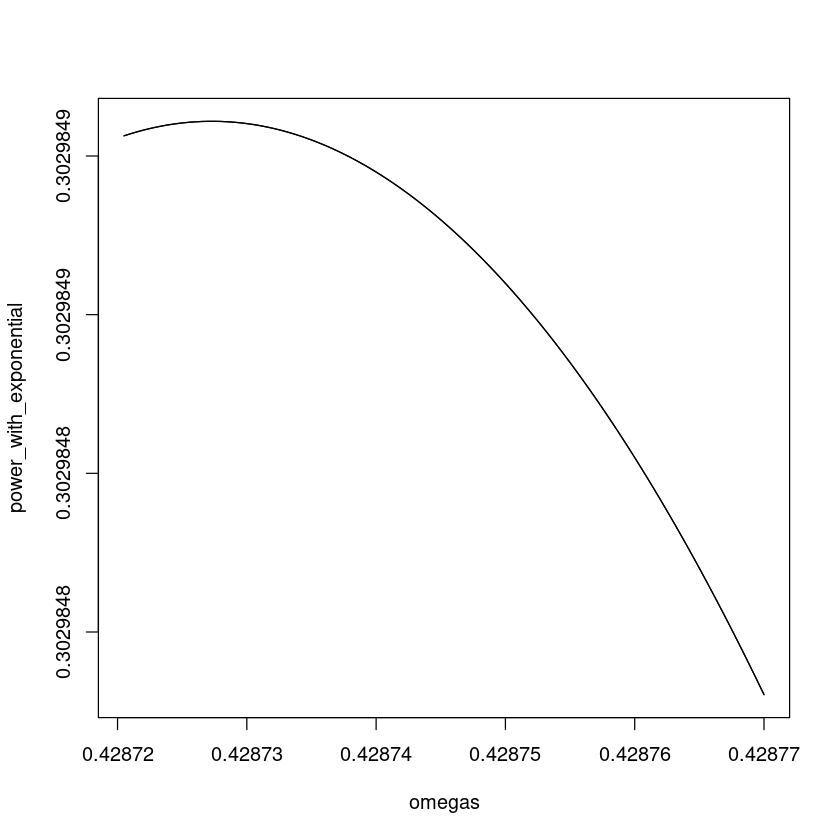

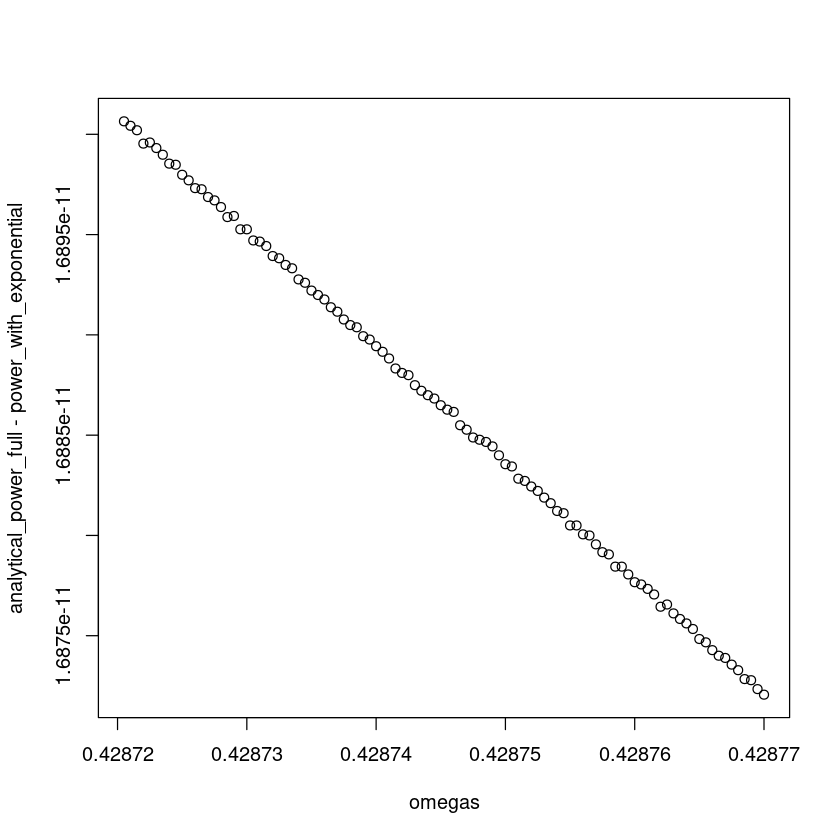

In [359]:
omega1 <- 0.429
omega2 <- 0.186
amp1 <- 1.1
amp2 <- 0.3
omegas <- seq(100)*0.0000005 + 0.42872
phi1 <- 0.4
signal <- amp1*cos(omega1*times + phi1) + amp2*cos(omega2*times + phi2)
power_with_exponential <- sapply(omegas, function(omega){
    Mod(hprod(signal, exp(1i*omega*times), times))^2})


    
analytical_power_full <- sapply(omegas, function(omega){
       (
    Mod ( 
        amp1*Q((omega1 - omega)*T) * exp(1i*((omega1 - omega)*T + phi1)) +
        amp1*Q((-omega1 - omega)*T) * exp(1i*((-omega1 - omega)*T - phi1)) +
        amp2*Q((omega2 - omega)*T) * exp(1i*((omega2 - omega)*T + phi2)) +
        amp2*Q((-omega2 - omega)*T) * exp(1i*((-omega2 - omega)*T - phi2))
    ) ^2  /4. )})

# this works but not super elegant. There might be a way to make it a bit better 
# but I am getting tired. 
    
plot (omegas, power_with_exponential, type='l')
lines(omegas, analytical_power_full)
abline(v=c(omega1, omega2))
plot ( omegas, analytical_power_full - power_with_exponential)


The analytical formulation is still exact. But one can see that the maxima are not quite at the corresponding omegas. This is the reason why we will attempt to make corrections. 

In [364]:
# simple version

epsilon1 <- amp2*(
               Qprime((omega2-omega1)*T)*cos((omega2-omega1)*T + phi2 - phi1)
                 ) / (amp1 * Qsecond0) / T

epsilon2 <- amp1*(
               Qprime((omega1-omega2)*T)*cos((omega1-omega2)*T + phi1 - phi2)
                ) / (amp2 * Qsecond0) / T


# full versions 

epsilon1_full <- (
           amp2 *  Qprime((omega2-omega1)*T)*cos((omega1-omega2)*T + phi1 - phi2) +
           amp2 *  Qprime((-omega2-omega1)*T)*cos((omega1+omega2)*T + phi1 + phi2) +
           amp1 *  Qprime((-omega1-omega1)*T)*cos((omega1+omega1)*T + phi1 + phi1)
       ) / (amp1 * Qsecond0) / T

epsilon2_full <- (
           amp1 *  Qprime((omega1-omega2)*T)*cos((omega2-omega1)*T + phi1 - phi2) +
           amp1 *  Qprime((-omega1-omega2)*T)*cos((omega2+omega1)*T - phi1 - phi2) +
           amp2 *  Qprime((-omega2-omega2)*T)*cos((omega2+omega2)*T + phi1 + phi1)
       ) / (amp2 * Qsecond0) / T


epsilon1
epsilon1_full

epsilon2
epsilon2_full

[1] -0.000249974

[1] -0.0002726114

[1] 0.003360762

[1] 0.002153191

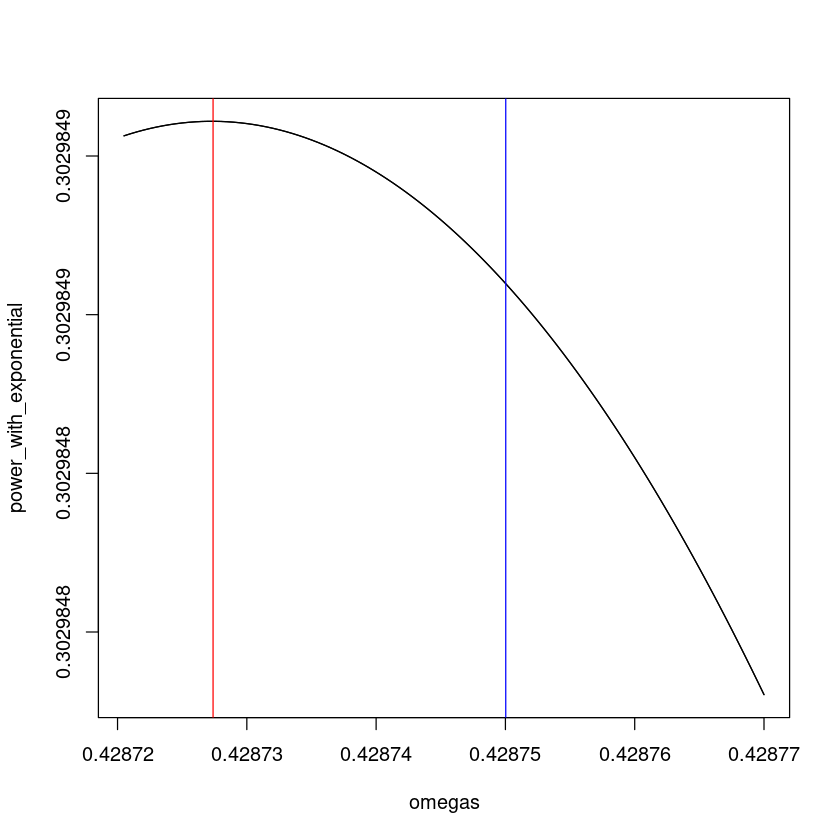

[1] -0.130691

[1] -0.243

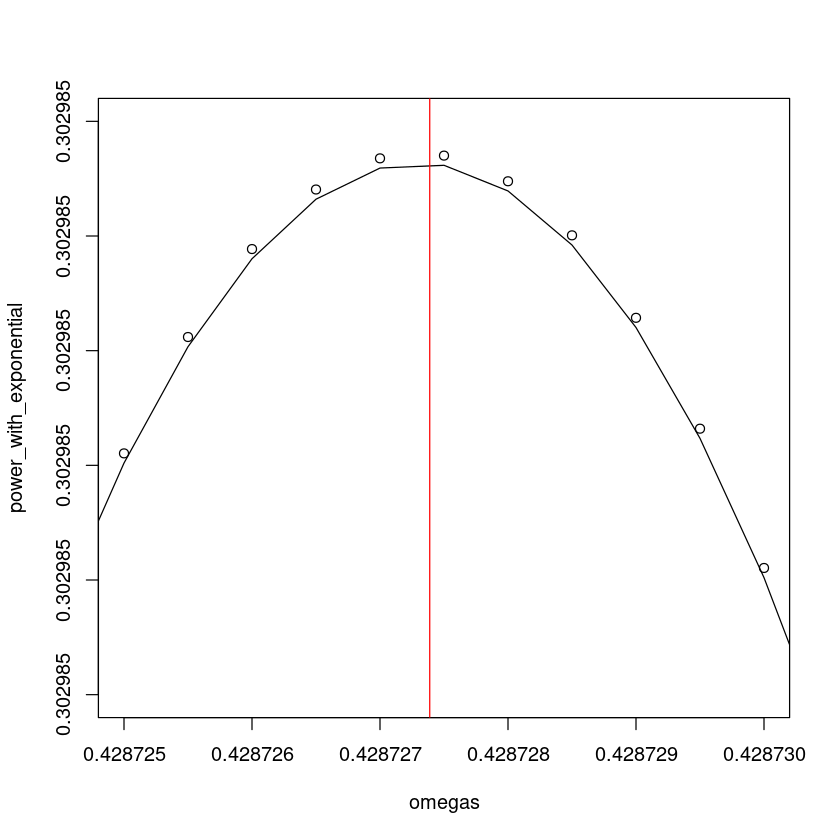

In [381]:
plot (omegas, power_with_exponential, type='l')
lines(omegas, analytical_power_full)
abline(v=c(omega1, omega2))
abline(v=c(omega1+(epsilon1), omega2+epsilon2), col='blue')
abline(v=c(omega1+(epsilon1_full), omega2+epsilon2), col='red')

plot (omegas, power_with_exponential, type='l', xlim=c(0.428725, 0.428730), ylim=c(0.30298496, 0.302984961))
points(omegas, analytical_power_full)
abline(v=c(omega1, omega2))
abline(v=c(omega1+(epsilon1), omega2+epsilon2), col='blue')
abline(v=c(omega1+(epsilon1_full), omega2+epsilon2), col='red')
Qsecond0
omega2-omega1

So the analytical method works, but only when deviations are really very small. 